In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
#For missing values
import missingno as msno

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('C:\\Users\\ATHAR\\Desktop\\Datasets\\Fake News Sentiments\\Fake_News_Classifier_NLP-master\\train.csv')
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train.shape

(20800, 5)

In [ ]:
print('hello')

In [5]:
train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

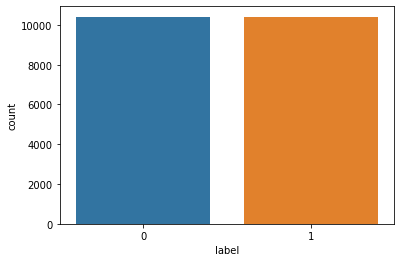

In [6]:

sns.countplot(train['label'])

Text(0.5, 1.0, 'Missing values of each columns')

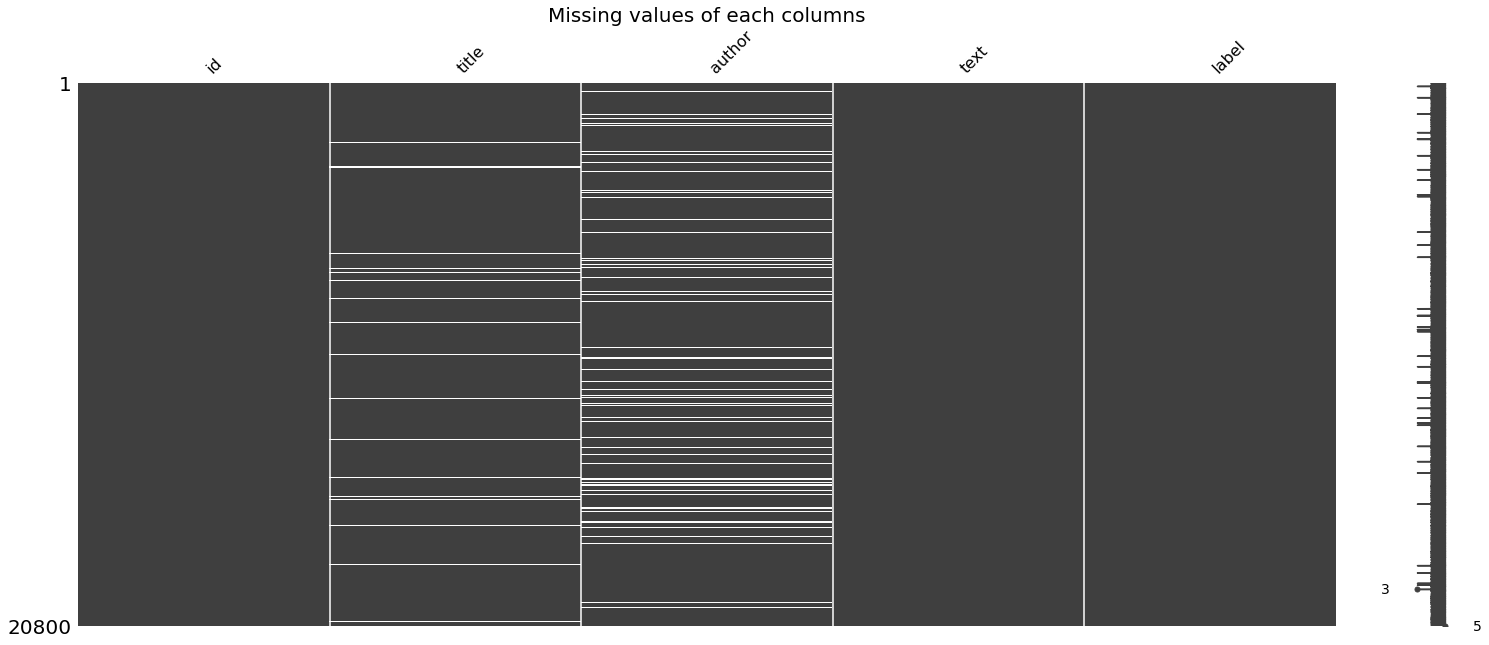

In [7]:
msno.matrix(train)
plt.title('Missing values of each columns',fontsize=20)

check Number of null values

In [8]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

drop null values

In [9]:
#Drop records having missing values
train.dropna(inplace=True)

In [10]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
train['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

# WORDCLOUDS

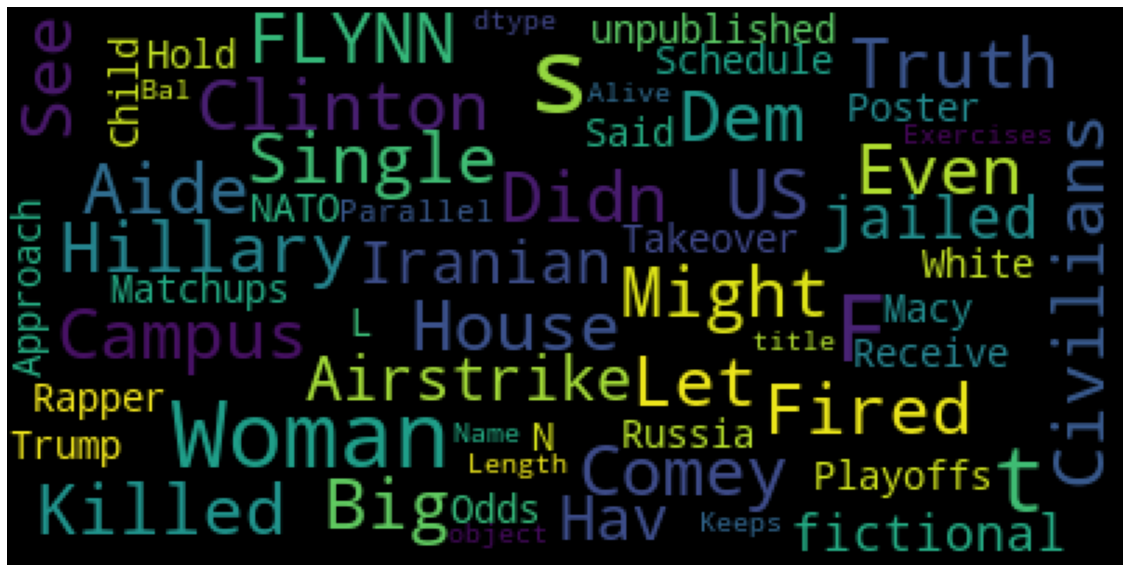

In [19]:
wordcloud_ = WordCloud(
                          background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(train['title'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

<AxesSubplot:xlabel='label', ylabel='count'>

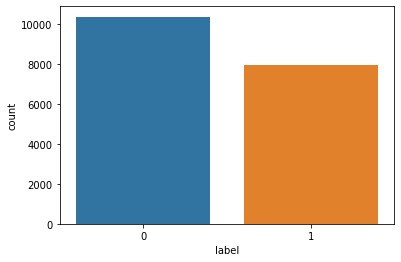

In [20]:
import seaborn as sns
sns.countplot(train['label'])

# separate independent and dependent features

In [21]:
X = train.drop("label",axis=1)
y = train['label']

In [22]:
X.shape

(18285, 4)

In [23]:
y.shape

(18285,)

In [24]:
#Reset the Index 
X.reset_index(inplace=True)

# remove stopwards and apply stemming from sentences

In [25]:
from nltk.stem import PorterStemmer
import re
ps = PorterStemmer()
corpus=[]

for i in range(len(X.index)):
    rev = re.sub('[^a-zA-Z]',' ',X['title'][i])
    rev = rev.lower()
    rev = rev.split()
    #Stemming and Stopword removal
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)

In [26]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

# import libraries

In [27]:
from tensorflow.keras.layers import Dense , Dropout , Embedding , LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

# one hot representation (convert words into indexes)


In [28]:
voc_size = 10000
onehot = [one_hot( word, voc_size) for word in corpus]
onehot

[[4288, 9792, 7228, 7093, 1731, 2461, 1742, 6331, 730, 9001],
 [8897, 6500, 5576, 8058, 7184, 5013, 8791],
 [4111, 3641, 3001, 289],
 [8741, 4622, 74, 4560, 1788, 3299],
 [4606, 7184, 2947, 1322, 6135, 3363, 7184, 5983, 2496, 8341],
 [7766,
  4764,
  4372,
  5264,
  2784,
  1130,
  2878,
  8780,
  9053,
  5490,
  1210,
  9821,
  7715,
  2854,
  8791],
 [6186, 8081, 6084, 4847, 6093, 1550, 8383, 2750, 4968, 9151, 9010],
 [2700, 7813, 369, 1728, 8731, 4300, 1130, 9356, 4968, 9151, 9010],
 [5662, 1147, 8376, 7408, 2972, 6085, 6130, 5588, 1130, 1739],
 [744, 5308, 3988, 788, 3394, 2775, 3840, 4579],
 [6041, 2066, 6977, 9016, 641, 6224, 6460, 9463, 1360, 8882, 1294],
 [4560, 939, 1731, 6085, 1130, 8731],
 [8895, 3479, 635, 9834, 4704, 3825, 9934, 8095, 4853],
 [8062, 2568, 6726, 5619, 1218, 5007, 500, 4968, 9151, 9010],
 [3013, 4993, 626, 464, 9878, 4968, 9151, 9010],
 [1797, 9324, 925, 6667, 8123, 6596, 6871, 6243, 1356, 4785],
 [8904, 1641, 6500],
 [5579, 6510, 3478, 3137, 1130, 962, 4890

# make all sentences(list of per sentence index) of equal size

In [29]:
max_sen_len=20
embedding = pad_sequences(onehot,maxlen=max_sen_len,padding='pre')
embedding

array([[   0,    0,    0, ..., 6331,  730, 9001],
       [   0,    0,    0, ..., 7184, 5013, 8791],
       [   0,    0,    0, ..., 3641, 3001,  289],
       ...,
       [   0,    0,    0, ..., 4968, 9151, 9010],
       [   0,    0,    0, ..., 8351, 5674, 3072],
       [   0,    0,    0, ..., 5274, 9924, 8533]])

In [30]:
import numpy as np
X_fnl = np.array(embedding)
Y_fnl = np.array(y)

In [31]:
len(X_fnl) , len(Y_fnl)

(18285, 18285)

# split data into train and test

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_fnl,Y_fnl,test_size=0.1,random_state=51)

In [33]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((16456, 20), (1829, 20), (16456,), (1829,))

In [34]:
X_train

array([[   0,    0,    0, ..., 5034, 7685, 8791],
       [   0,    0,    0, ..., 4968, 9151, 9010],
       [   0,    0,    0, ..., 1970, 5013,  369],
       ...,
       [   0,    0,    0, ..., 5217, 4074,  675],
       [   0,    0,    0, ..., 4968, 9151, 9010],
       [   0,    0,    0, ..., 1725, 3094, 8370]])

# define layers

In [35]:
dim=45
model = Sequential()
model.add(Embedding(voc_size , dim , input_length=max_sen_len))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(1 , activation='sigmoid'))
model.compile(optimizer="adam" , loss="binary_crossentropy", metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 45)            450000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 45)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               196800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 647,001
Trainable params: 647,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train , Y_train , validation_data=(X_test,Y_test) , epochs=50 , batch_size=16)

Epoch 1/50
1029/1029 [==============================] - 16s 11ms/step - loss: 0.3079 - accuracy: 0.8537 - val_loss: 0.1703 - val_accuracy: 0.9273
Epoch 2/50
1029/1029 [==============================] - 10s 10ms/step - loss: 0.1203 - accuracy: 0.9560 - val_loss: 0.1700 - val_accuracy: 0.9317
Epoch 3/50
1029/1029 [==============================] - 10s 10ms/step - loss: 0.0697 - accuracy: 0.9773 - val_loss: 0.1829 - val_accuracy: 0.9360
Epoch 4/50
1029/1029 [==============================] - 11s 11ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.2044 - val_accuracy: 0.9360
Epoch 5/50
1029/1029 [==============================] - 10s 10ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.2428 - val_accuracy: 0.9311
Epoch 6/50
1029/1029 [==============================] - 10s 10ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.2770 - val_accuracy: 0.9322
Epoch 7/50
1029/1029 [==============================] - 10s 10ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.3465 -

# Prediction

In [28]:
pred = model.predict_classes(X_test)

In [29]:
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

# Evaluation

In [30]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(f"Accuracy  \n{accuracy_score(pred,Y_test)}")
print(f"Confusion Matrix =\n {confusion_matrix(pred,Y_test)}")
print(f"Accuracy =\n {classification_report(pred,Y_test)}")

Accuracy  
0.9234554401312193
Confusion Matrix =
 [[987  69]
 [ 71 702]]
Accuracy =
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1056
           1       0.91      0.91      0.91       773

    accuracy                           0.92      1829
   macro avg       0.92      0.92      0.92      1829
weighted avg       0.92      0.92      0.92      1829



# Save model

In [33]:
model.save('Fake_News_Classifier.h5')

# load model

In [37]:
from tensorflow.keras.models import load_model
classifier = load_model('Fake_News_Classifier.h5')

In [38]:
#Upload Testing Data

test = pd.read_csv("C:\\Users\\ATHAR\\Desktop\\Datasets\\Fake News Sentiments\\Fake_News_Classifier_NLP-master\\test.csv")


In [39]:
test.shape

(4575, 5)

In [40]:
#See testing data
test.head()

,Unnamed: 0,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [43]:

print(test[['title']])

                                                  title
0     Specter of Trump Loosens Tongues, if Not Purse...
1     #NoDAPL: Native American Leaders Vow to Stay A...
2     Tim Tebow Will Attempt Another Comeback, This ...
3                       Keiser Report: Meme Wars (E995)
4     Pelosi Calls for FBI Investigation to Find Out...
...                                                 ...
4570  Trump on If ’Tapes’ Exist of Comey Conversatio...
4571  The Bangladeshi Traffic Jam That Never Ends - ...
4572  John Kasich Signs One Abortion Bill in Ohio bu...
4573  California Today: What, Exactly, Is in Your Su...
4574  Awkward Sex, Onscreen and Off - The New York T...

[4575 rows x 1 columns]


In [56]:
#list(test['title'])

['Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times',
 '#NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against Police',
 'Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times',
 'Keiser Report: Meme Wars (E995)',
 'Pelosi Calls for FBI Investigation to Find Out ’What the Russians Have on Donald Trump’ - Breitbart',
 'Weekly Featured Profile – Randy Shannon',
 '184 U.S. generals and admirals endorse Trump for Commander-In-Chief',
 '“Working Class Hero” by John Brennon',
 'The Rise of Mandatory Vaccinations Means the End of Medical Freedom',
 'Communists Terrorize Small Business',
 'Computer Programmer Comes Forward, Admits To Being Paid To Rig Voting Booths! TRUMP WAS RIGHT! • USA Newsflash',
 'Thieves Take a Chunk of Change, All 221 Pounds of It, From a Berlin Museum - The New York Times',
 'New England Patriots’ Owner, Still Sore at N.F.L., Has Payback in Sight - The New York Times',
 'C

# Testing of Model on test dataset(Multiple sentence testing)

In [44]:
def test_model(dataset):
    corpus1=[]

    for i in range(len(dataset.index)):
        rev = re.sub('[^a-zA-Z]',' ',dataset[i])
        rev = rev.lower()
        rev = rev.split()
    #Apply Stemming and remove stopword
        rev = [ps.stem(word) for word in rev if word not in set(stopwords.words('english'))]
        rev = ' '.join(rev)
        corpus1.append(rev)
    
  #Apply onehot encoding      
    voc_size1 = 10000
    onehot1 = [one_hot( word, voc_size) for word in corpus1]

    max_sen_len1=20
    embedding1 = pad_sequences(onehot1,maxlen=max_sen_len,padding='pre')
    
    X = np.array(embedding1)
    pred1 = classifier.predict_classes(X)
    return pred1

In [45]:
pred1 = test_model(test['title'])

In [46]:
pred1

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [47]:
pred1 = ["Real" if i==1 else "Fake" for i in pred1 ]

In [48]:
len(pred1) , len(test['title'])

(4575, 4575)

In [49]:
test_data = pd.DataFrame(np.c_[test['title'] ,pred1 ] , columns=['News' , 'Label'] )

In [50]:
test_data

,News,Label
0,"Specter of Trump Loosens Tongues, if Not Purse...",Real
1,#NoDAPL: Native American Leaders Vow to Stay A...,Real
2,"Tim Tebow Will Attempt Another Comeback, This ...",Real
3,Keiser Report: Meme Wars (E995),Real
4,Pelosi Calls for FBI Investigation to Find Out...,Fake
...,...,...
4570,Trump on If ’Tapes’ Exist of Comey Conversatio...,Real
4571,The Bangladeshi Traffic Jam That Never Ends - ...,Real
4572,John Kasich Signs One Abortion Bill in Ohio bu...,Fake
4573,"California Today: What, Exactly, Is in Your Su...",Real


In [51]:
print(test_data.loc[17,'News'])


President Obama and President-Elect Donald Trump Meet at White House


# Testing of Model on a single sentence

In [52]:
def test_model(dataset):
    corpus1=[]

    rev = re.sub('[^a-zA-Z]',' ',dataset)
    rev = rev.lower()
    rev = rev.split()

    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus1.append(rev)
    
        
    voc_size1 = 10000
    onehot1 = [one_hot( word, voc_size) for word in corpus1]

    max_sen_len1=20
    embedding1 = pad_sequences(onehot1,maxlen=max_sen_len,padding='pre')
    
    X = np.array(embedding1)
    pred1 = classifier.predict_classes(X)
    if pred1 == 1:
        return "Message is Real"
    return "Message is Fake"

In [53]:
pred2 = test_model('Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times')
pred2

'Message is Real'

In [54]:
pred2 = test_model('President Obama and President-Elect Donald Trump Meet at White House')
pred2

'Message is Fake'